In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

In [ ]:
data1 = pd.read_csv("final_psafe_dataset.csv")

In [ ]:
np.median(data1['psafe'])

np.float64(5.0)

In [15]:
data1['gender'].value_counts()
data1[data1['mode'] == 'car']['psafe'].describe() #car mean value=4.82

count    600.000000
mean       4.818333
std        1.598830
min        1.000000
25%        4.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: psafe, dtype: float64

In [16]:
data1[data1['mode'] == 'ebike']['psafe'].describe() #e-bike mean value=3.59

count    600.000000
mean       3.585000
std        1.669557
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        7.000000
Name: psafe, dtype: float64

In [17]:
data1[data1['mode'] == 'escooter']['psafe'].describe() #e-scooter mean value= 2.94

count    600.000000
mean       2.936667
std        1.639248
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: psafe, dtype: float64

In [18]:
data1[data1['mode'] == 'walk']['psafe'].describe() #walking mean value=5.18

count    600.000000
mean       5.185000
std        1.721156
min        1.000000
25%        4.000000
50%        6.000000
75%        7.000000
max        7.000000
Name: psafe, dtype: float64

In [3]:
#Female
Female_psafe = data1[data1['gender'] == 0]['psafe'].describe()
#Male
Male_psafe = data1[data1['gender'] == 1]['psafe'].describe()
print(pd.DataFrame({
    'Female': Female_psafe,
    'Male': Male_psafe
}))

            Female         Male
count  1200.000000  1200.000000
mean      4.141667     4.120833
std       1.898579     1.882158
min       1.000000     1.000000
25%       3.000000     3.000000
50%       4.000000     4.000000
75%       6.000000     6.000000
max       7.000000     7.000000


In [4]:
male_car = data1[(data1['mode'] == 'car') & (data1['gender'] == 0)]['psafe'].describe()
female_car = data1[(data1['mode'] == 'car') & (data1['gender'] == 1)]['psafe'].describe()
print(pd.DataFrame({
    'Female Car': female_car,
    'Male Car': male_car
}))

       Female Car    Male Car
count  300.000000  300.000000
mean     4.616667    5.020000
std      1.733900    1.425848
min      1.000000    1.000000
25%      3.000000    4.000000
50%      5.000000    5.000000
75%      6.000000    6.000000
max      7.000000    7.000000


In [5]:
male_ebike = data1[(data1['mode'] == 'ebike') & (data1['gender'] == 0)]['psafe'].describe()
female_ebike = data1[(data1['mode'] == 'ebike') & (data1['gender'] == 1)]['psafe'].describe()
print(pd.DataFrame({
    'Female E-bike': female_ebike,
    'Male E-bike': male_ebike
}))

       Female E-bike  Male E-bike
count     300.000000   300.000000
mean        3.680000     3.490000
std         1.728456     1.605769
min         1.000000     1.000000
25%         2.000000     2.000000
50%         3.000000     3.000000
75%         5.000000     5.000000
max         7.000000     7.000000


In [6]:
male_escooter = data1[(data1['mode'] == 'escooter') & (data1['gender'] == 0)]['psafe'].describe()
female_escooter = data1[(data1['mode'] == 'escooter') & (data1['gender'] == 1)]['psafe'].describe()
print(pd.DataFrame({
    'Female E-scooter': female_escooter,
    'Male E-scooter': male_escooter
}))


       Female E-scooter  Male E-scooter
count        300.000000      300.000000
mean           3.110000        2.763333
std            1.570389        1.690220
min            1.000000        1.000000
25%            2.000000        1.000000
50%            3.000000        2.000000
75%            4.000000        4.000000
max            7.000000        7.000000


In [7]:
male_walk = data1[(data1['mode'] == 'walk') & (data1['gender'] == 0)]['psafe'].describe()
female_walk = data1[(data1['mode'] == 'walk') & (data1['gender'] == 1)]['psafe'].describe()
print(pd.DataFrame({
    'Female Walk': female_walk,
    'Male Walk': male_walk
}))


       Female Walk   Male Walk
count   300.000000  300.000000
mean      5.076667    5.293333
std       1.833575    1.596596
min       1.000000    1.000000
25%       4.000000    4.000000
50%       6.000000    6.000000
75%       7.000000    7.000000
max       7.000000    7.000000


In [12]:
owns_license = data1[data1['license_own'] == 1]['psafe'].describe()
not_owns_license = data1[data1['license_own'] == 0]['psafe'].describe()
print(pd.DataFrame({
    'Has a License': owns_license,
    'Does not have License': not_owns_license
}))

       Has a License  Does not have License
count    1440.000000             960.000000
mean        4.187500               4.046875
std         1.902665               1.868707
min         1.000000               1.000000
25%         3.000000               3.000000
50%         4.000000               4.000000
75%         6.000000               5.250000
max         7.000000               7.000000


In [37]:
owns_license = data1[(data1['mode'] == 'car') & (data1['license_own'] == 1)]['psafe'].describe()
not_owns_license = data1[(data1['mode'] == 'car') & (data1['license_own'] == 0)]['psafe'].describe()
print(pd.DataFrame({
    'Has a License': owns_license,
    'Does not have License': not_owns_license
}))

       Has a License  Does not have License
count     360.000000             240.000000
mean        4.888889               4.712500
std         1.621200               1.562053
min         1.000000               1.000000
25%         4.000000               4.000000
50%         5.000000               5.000000
75%         6.000000               6.000000
max         7.000000               7.000000


In [38]:
young = data1[data1['young'] == 0]['psafe'].describe()
not_young = data1[data1['young'] == 1]['psafe'].describe()
print(pd.DataFrame({
    'Young': young,
    'Not Young': not_young
}))

            Young    Not Young
count  528.000000  1872.000000
mean     4.138258     4.129274
std      1.891210     1.890186
min      1.000000     1.000000
25%      2.000000     3.000000
50%      4.000000     4.000000
75%      6.000000     6.000000
max      7.000000     7.000000


In [40]:
type0 = data1[data1['type'] == 3]['psafe'].describe() #Type 0 bigger sidewalks with cycle lane
type1 = data1[data1['type'] == 1]['psafe'].describe() #Type 1 smaller sidewalks no cycle lane
type2 = data1[data1['type'] == 2]['psafe'].describe() #Type 2 bigger sidewalks no cycle lane
type3 = data1[data1['type'] == 4]['psafe'].describe() #Type 3 Shared space
print(pd.DataFrame({
    'Type 0': type0,
    'Type 1': type1,
    'Type 2': type2,
    'Type 3': type3
}))

           Type 0      Type 1      Type 2      Type 3
count  600.000000  600.000000  600.000000  600.000000
mean     5.185000    3.463333    3.758333    4.118333
std      1.582703    1.815898    1.876824    1.811943
min      1.000000    1.000000    1.000000    1.000000
25%      4.000000    2.000000    2.000000    3.000000
50%      5.000000    3.000000    4.000000    4.000000
75%      7.000000    5.000000    5.000000    6.000000
max      7.000000    7.000000    7.000000    7.000000


In [7]:
type0_car = data1[(data1['mode'] == 'car') & (data1['type'] == 3)]['psafe'].describe()
type0_ebike = data1[(data1['mode'] == 'ebike') & (data1['type'] == 3)]['psafe'].describe() #Type 1 smaller sidewalks no cycle lane
type0_escoot = data1[(data1['mode'] == 'escooter') & (data1['type'] == 3)]['psafe'].describe() #Type 2 bigger sidewalks no cycle lane
type0_walk = data1[(data1['mode'] == 'walk') & (data1['type'] == 3)]['psafe'].describe() #Type 3 Shared space
print(pd.DataFrame({
    'car': type0_car,
    'ebike': type0_ebike,
    'escooter': type0_escoot,
    'walk': type0_walk
}))

              car       ebike    escooter        walk
count  150.000000  150.000000  150.000000  150.000000
mean     5.360000    5.213333    4.493333    5.673333
std      1.357455    1.556914    1.649676    1.526045
min      2.000000    1.000000    1.000000    1.000000
25%      4.000000    4.000000    3.000000    5.000000
50%      5.000000    6.000000    5.000000    6.000000
75%      7.000000    6.000000    6.000000    7.000000
max      7.000000    7.000000    7.000000    7.000000


In [8]:
type1_car = data1[(data1['mode'] == 'car') & (data1['type'] == 1)]['psafe'].describe()
type1_ebike = data1[(data1['mode'] == 'ebike') & (data1['type'] == 1)]['psafe'].describe() #Type 1 smaller sidewalks no cycle lane
type1_escoot = data1[(data1['mode'] == 'escooter') & (data1['type'] == 1)]['psafe'].describe() #Type 2 bigger sidewalks no cycle lane
type1_walk = data1[(data1['mode'] == 'walk') & (data1['type'] == 1)]['psafe'].describe() #Type 3 Shared space
print(pd.DataFrame({
    'car': type1_car,
    'ebike': type1_ebike,
    'escooter': type1_escoot,
    'walk': type1_walk
}))

              car       ebike    escooter        walk
count  150.000000  150.000000  150.000000  150.000000
mean     4.526667    2.720000    2.173333    4.433333
std      1.755898    1.204689    1.079067    1.800137
min      1.000000    1.000000    1.000000    1.000000
25%      3.000000    2.000000    1.000000    3.000000
50%      5.000000    3.000000    2.000000    5.000000
75%      6.000000    3.000000    3.000000    6.000000
max      7.000000    6.000000    6.000000    7.000000


In [9]:
type2_car = data1[(data1['mode'] == 'car') & (data1['type'] == 2)]['psafe'].describe()
type2_ebike = data1[(data1['mode'] == 'ebike') & (data1['type'] == 2)]['psafe'].describe() #Type 1 smaller sidewalks no cycle lane
type2_escoot = data1[(data1['mode'] == 'escooter') & (data1['type'] == 2)]['psafe'].describe() #Type 2 bigger sidewalks no cycle lane
type2_walk = data1[(data1['mode'] == 'walk') & (data1['type'] == 2)]['psafe'].describe() #Type 3 Shared space
print(pd.DataFrame({
    'car': type2_car,
    'ebike': type2_ebike,
    'escooter': type2_escoot,
    'walk': type2_walk
}))

              car       ebike    escooter        walk
count  150.000000  150.000000  150.000000  150.000000
mean     4.613333    2.966667    2.260000    5.193333
std      1.621113    1.228393    1.155262    1.728935
min      1.000000    1.000000    1.000000    1.000000
25%      4.000000    2.000000    1.000000    4.000000
50%      5.000000    3.000000    2.000000    6.000000
75%      6.000000    4.000000    3.000000    7.000000
max      7.000000    7.000000    7.000000    7.000000


In [10]:
type3_car = data1[(data1['mode'] == 'car') & (data1['type'] == 4)]['psafe'].describe()
type3_ebike = data1[(data1['mode'] == 'ebike') & (data1['type'] == 4)]['psafe'].describe() #Type 1 smaller sidewalks no cycle lane
type3_escoot = data1[(data1['mode'] == 'escooter') & (data1['type'] == 4)]['psafe'].describe() #Type 2 bigger sidewalks no cycle lane
type3_walk = data1[(data1['mode'] == 'walk') & (data1['type'] == 4)]['psafe'].describe() #Type 3 Shared space
print(pd.DataFrame({
    'car': type3_car,
    'ebike': type3_ebike,
    'escooter': type3_escoot,
    'walk': type3_walk
}))

              car       ebike    escooter        walk
count  150.000000  150.000000  150.000000  150.000000
mean     4.773333    3.440000    2.820000    5.440000
std      1.515675    1.411744    1.442732    1.573608
min      1.000000    1.000000    1.000000    1.000000
25%      4.000000    2.000000    2.000000    5.000000
50%      5.000000    3.000000    3.000000    6.000000
75%      6.000000    4.000000    4.000000    7.000000
max      7.000000    7.000000    7.000000    7.000000


In [ ]:
data1[(data1['mode'] == 'car') & (data1['license_own'] == 1)]['psafe'].describe()

In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('psafe ~ gender + education + employment + income + license_own + car_own + bike_own + young', data=data1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table['PR(>F)']=np.round(anova_table['PR(>F)'],3)
print(anova_table)
#Gender and employment is not statistically significant (p-value>0.05)
#young variable was not statistically significant so age is used instead

                  sum_sq      df          F  PR(>F)
gender          0.122687     1.0   0.035381   0.851
education      35.239934     1.0  10.162731   0.001
employment     30.111607     1.0   8.683790   0.003
income         54.445995     1.0  15.701505   0.000
license_own    96.962010     1.0  27.962563   0.000
car_own        23.243886     1.0   6.703230   0.010
bike_own       13.285807     1.0   3.831451   0.050
young           7.020686     1.0   2.024673   0.155
Residual     8290.948539  2391.0        NaN     NaN


In [42]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('psafe ~ age + education + income + license_own + car_own + bike_own', data=data1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table['PR(>F)']=np.round(anova_table['PR(>F)'],3)
print(anova_table)

                  sum_sq      df          F  PR(>F)
age            61.841540     1.0  17.897031   0.000
education      21.776854     1.0   6.302253   0.012
income        214.092064     1.0  61.958552   0.000
license_own    81.751219     1.0  23.658921   0.000
car_own        25.559578     1.0   7.396979   0.007
bike_own       17.398457     1.0   5.035139   0.025
Residual     8268.790820  2393.0        NaN     NaN


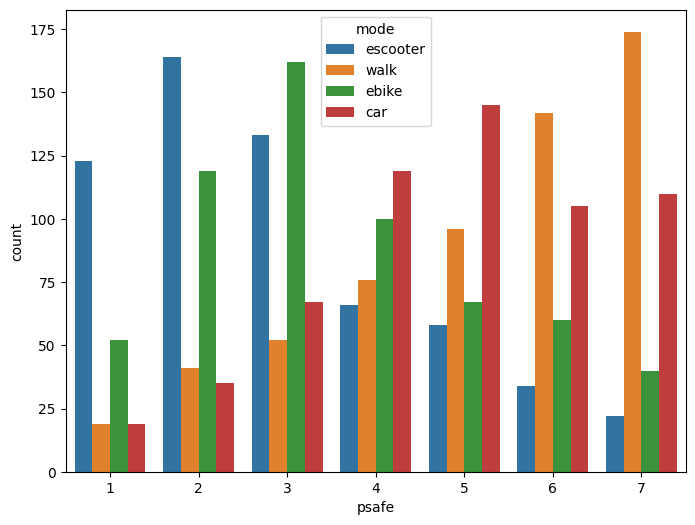

In [43]:
plt.figure(figsize=(8,6))
sns.countplot(x="psafe", hue="mode", data=data1)
plt.show()

In [3]:
from scipy.stats import kendalltau

def corr(df, x, m):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Compute the correlation matrix for numeric columns using the specified method (Kendall)
    corr_matrix = numeric_df.corr(method=m)

    # Initialize a matrix to store p-values
    p_values = pd.DataFrame(np.zeros(corr_matrix.shape), columns=corr_matrix.columns, index=corr_matrix.index)

    # Perform the correlation significance test (Kendall's Tau)
    for row in numeric_df.columns:
        for col in numeric_df.columns:
            if row != col:
                _, p_values.loc[row, col] = kendalltau(numeric_df[row], numeric_df[col])


    plt.figure(figsize=(14, 12))  
    sns.set(font_scale=1.2)  

    ax = sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', cbar=True, 
                     annot_kws={'size': 12}, linewidths=0.5, linecolor='gray')

    # Adding p-values to the plot for significance
    for i in range(len(corr_matrix.columns)):
        for j in range(len(corr_matrix.columns)):
            if i != j:
                p_value = p_values.iloc[i, j]
                if p_value < x:
                    ax.text(j + 0.5, i + 0.5, f"p={p_value:.3f}", ha='center', va='center', color='black', fontsize=10)

    plt.title(f'Kendall Correlation Matrix with Significance (Significance level = {x})', fontsize=16)
    plt.xticks(rotation=45, ha="right")  
    plt.yticks(rotation=0)  
    plt.tight_layout() 
    plt.savefig("Kendall_corr_matrix.png", dpi=300) 
    plt.show()

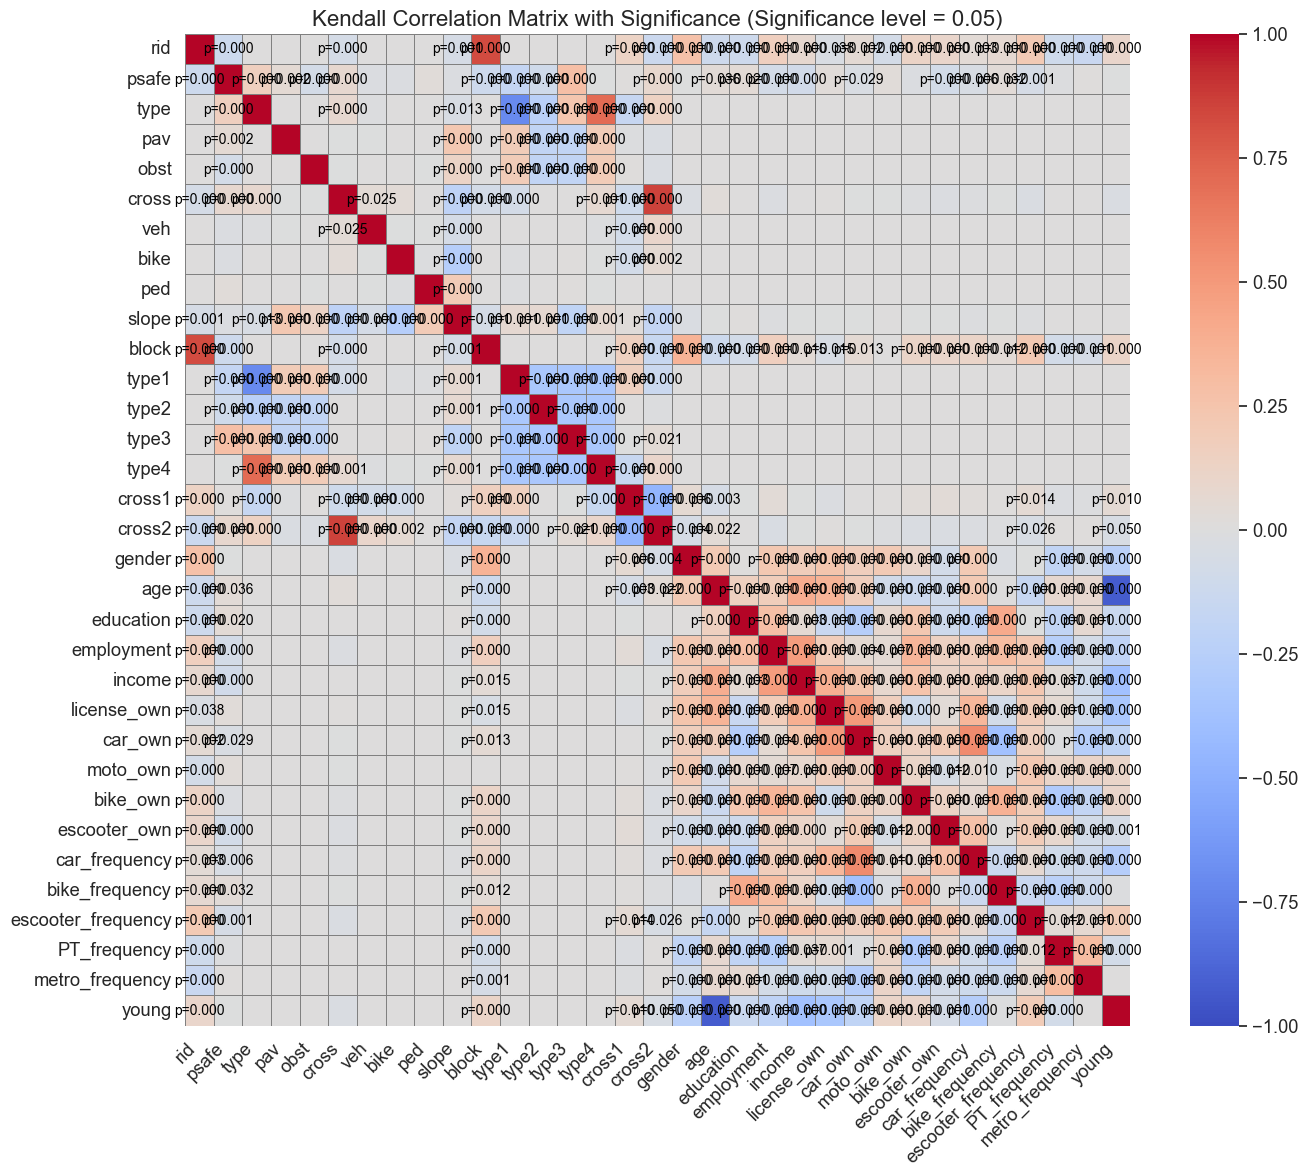

In [4]:
corr(data1, 0.05, 'kendall')

In [4]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(df, features):
    # Adding constant for intercept in the regression model
    X = df[features]
    X = add_constant(X)  # Adds a column of ones for the intercept term

    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return vif_data


In [5]:
features = ['age', 'income', 'license_own', 'type1', 'type2', 'type4', 'pav', 'cross1', 'cross2', 'obst', 'veh', 'bike', 'ped']

vif_result = calculate_vif(data1, features)
print(vif_result)
#no significant multicolinearity

       Variable        VIF
0         const  24.286532
1           age   1.213406
2        income   1.263242
3   license_own   1.263062
4         type1   1.742469
5         type2   1.509803
6         type4   1.729448
7           pav   1.145687
8        cross1   1.304521
9        cross2   1.302155
10         obst   1.145587
11          veh   1.019534
12         bike   1.008251
13          ped   1.000374


In [6]:
vif_result.to_csv("VIF_results.csv")

In [6]:
#Colinearity check
formula = 'psafe ~ age + income + license_own + type1 + type2 + type4 + pav + cross1 + cross2 + obst + veh + bike + ped'
model = ols(formula, data=data1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  psafe   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     38.42
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           6.35e-89
Time:                        21:51:38   Log-Likelihood:                -4704.7
No. Observations:                2400   AIC:                             9437.
Df Residuals:                    2386   BIC:                             9518.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.5889      0.173     26.470      